In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = r'C:\Users\creat\Downloads\archive\training_set\training_set'

# Image dimensions
img_height, img_width = 64, 64

# Data generators
datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalize pixel values
    validation_split=0.2     # Split 20% of data for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\creat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


C:\Users\creat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 428ms/step - accuracy: 0.5427 - loss: 0.6842 - val_accuracy: 0.5921 - val_loss: 0.6644
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.6327 - loss: 0.6371 - val_accuracy: 0.6796 - val_loss: 0.5990
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.7004 - loss: 0.5791 - val_accuracy: 0.7302 - val_loss: 0.5492
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.7503 - loss: 0.5191 - val_accuracy: 0.7620 - val_loss: 0.5013
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.7719 - loss: 0.4692 - val_accuracy: 0.7664 - val_loss: 0.4846
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.7974 - loss: 0.4265 - val_accuracy: 0.7645 - val_loss: 0.4825
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.8297 - loss: 0.3773 - val_accuracy: 0.7833 - val_loss: 0.4761
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.8562 - loss: 0.3

In [36]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy:.2f}')


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.7688 - loss: 0.5266
Validation Accuracy: 0.77


In [37]:
model.save('hand_gesture_model.h5')


In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('hand_gesture_model.h5')



In [53]:
# Load and preprocess a test image
test_image = image.load_img(r'C:\Users\creat\Downloads\archive\leapGestRecog\leapGestRecog\09\08_palm_moved\frame_09_08_0183.png', target_size=(img_height, img_width))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)



In [54]:
# Predict the class
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted class: 0


In [55]:
# Assuming you have a list of class labels
class_labels = ['Thumbs Up', 'Peace', 'Stop']

# Get the predicted label
predicted_label = class_labels[predicted_class]

# Output the predicted label
print(f'Predicted gesture: {predicted_label}')


Predicted gesture: Thumbs Up


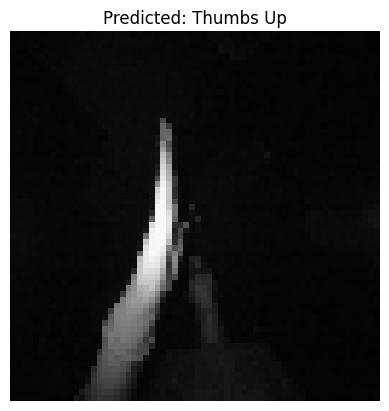

In [56]:
# Show the image with the predicted class
plt.imshow(test_image[0])
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [57]:
if predicted_label == 'Thumbs Up':
    print("Action: Play music!")
elif predicted_label == 'Peace':
    print("Action: Pause music!")
elif predicted_label == 'Stop':
    print("Action: Stop the video!")


Action: Play music!
